In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
from rllab.misc.ext import flatten
from rllab.viskit import core
from rllab.misc import ext
import sys
import argparse
import json
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
plt.rcParams["font.family"] = "Times New Roman"
sns.set(color_codes=True)
sns.set_style("whitegrid", {'axes.grid' : False, 'font.family':  "Times New Roman", 'font.weight':'bold'})

In [2]:
def collect_data(dataset, vals):
    data = []
    for datapoint in dataset:
        flat = datapoint['flat_params']
        good = True
        for k, v in vals.items():
            if not (k in flat and flat[k] == v):
                good = False
                break
        if good:# and len(datapoint['progress']['ReturnTrue'])== 100:
            data.append(datapoint['progress']['ReturnTrue'])
    maxx = max([len(x) for x in data])
#     data = [x for x in data if len(x) == maxx]
    return data

In [3]:
real_abs2 = core.load_exps_data(['data/s3/r-real-ab2'], False)
real_abs3 = core.load_exps_data(['data/s3/r-real-ab3'], False)
real1 = core.load_exps_data(['data/s3/r-real1'], False)
inception5 = core.load_exps_data(['data/s3/r-inception5'], False)
real_ours = collect_data(real_abs2, {'json_args.algo.mode2' : 'ours'})
real_ours_nofeat = collect_data(real_abs2, {'json_args.algo.mode2' : 'ours_nofeat'})
real_ours_noimage = collect_data(real_abs2, {'json_args.algo.mode2' : 'ours_noimage'})
real_l1 = collect_data(real_abs2, {'json_args.algo.mode2' : 'ab_l1'})
real_l2l3 = collect_data(real_abs2, {'json_args.algo.mode2' : 'ab_l2l3'})
real_l2 = collect_data(real_abs3, {'json_args.algo.mode2' : 'ab_l2'})
real_ours2 = collect_data(real1, {'json_args.algo.mode' : 'ours'})
real_oracle = collect_data(real1, {'json_args.algo.mode' : 'oracle'})
real_inception_6c = collect_data(inception5, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'real', 
                                           'json_args.algo.layer':'Mixed_6c'})
real_inception_7c = collect_data(inception5, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'real', 
                                           'json_args.algo.layer':'Mixed_7c'})
real_inception_5b = collect_data(inception5, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'real', 
                                           'json_args.algo.layer':'Mixed_5b'})

real_testgailreal = core.load_exps_data(['data/s3/testgailpushreal'], False)
real_gail = collect_data(real_testgailreal, {})

Reading data/s3/r-real-ab2/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-real-ab2/progress.csv'
Reading data/s3/r-real-ab2/r-real-ab2_2017_05_14_17_34_19_0034/progress.csv
Reading data/s3/r-real-ab2/r-real-ab2_2017_05_14_17_34_19_0034/gym_log/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-real-ab2/r-real-ab2_2017_05_14_17_34_19_0034/gym_log/progress.csv'
Reading data/s3/r-real-ab2/r-real-ab2_2017_05_14_17_34_19_0008/progress.csv
Reading data/s3/r-real-ab2/r-real-ab2_2017_05_14_17_34_19_0008/gym_log/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-real-ab2/r-real-ab2_2017_05_14_17_34_19_0008/gym_log/progress.csv'
Reading data/s3/r-real-ab2/r-real-ab2_2017_05_14_17_34_19_0044/progress.csv
Reading data/s3/r-real-ab2/r-real-ab2_2017_05_14_17_34_19_0044/gym_log/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-real-ab2/r-real-ab2_2017_05_14_17_34_19_0044/gym_log/progress.csv'
Reading data/s3/r-real-ab2/r-real-ab2_2017_05_14_17_34_19_0052/p

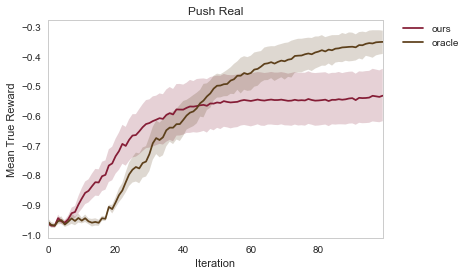

In [4]:
colors = sns.husl_palette(8, l=.3, s=.8)
plt.figure(figsize=(6,4))
sns.tsplot(real_ours, color=colors[0], condition='ours')
ax = sns.tsplot(real_oracle, color=colors[1], condition='oracle')
ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Push Real')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

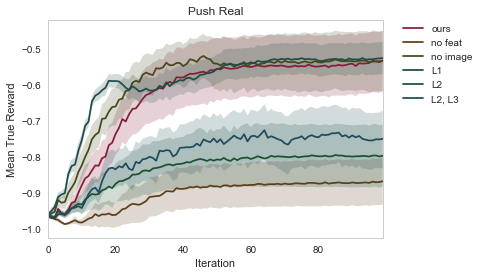

In [5]:
plt.figure(figsize=(6,4))
sns.tsplot(real_ours, color=colors[0], condition='ours')
sns.tsplot(real_ours_nofeat, color=colors[1], condition='no feat')
sns.tsplot(real_ours_noimage, color=colors[2], condition='no image')
sns.tsplot(real_l1, color=colors[3], condition='L1')
sns.tsplot(real_l2, color=colors[4], condition='L2')
ax =sns.tsplot(real_l2l3, color=colors[5], condition='L2, L3')
ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Push Real')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

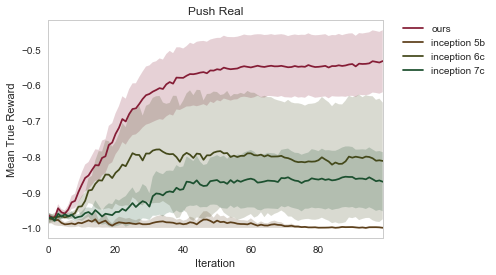

In [6]:
plt.figure(figsize=(6,4))
sns.tsplot(real_ours, color=colors[0], condition='ours')
ax = sns.tsplot(real_inception_5b, color=colors[1], condition='inception 5b')
sns.tsplot(real_inception_6c, color=colors[2], condition='inception 6c')
sns.tsplot(real_inception_7c, color=colors[3], condition='inception 7c')
ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Push Real')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [7]:
reach_distract_comp = core.load_exps_data(['../rllab-reach/data/s3/reach-distract-comp'], False)
reach_ours = collect_data(reach_distract_comp, {'json_args.env.env.mode' : 'ours'})
reach_oracle = collect_data(reach_distract_comp, {'json_args.env.env.mode' : 'oracle'})
reachoursablationnofeat = core.load_exps_data(['data/s3/reachoursablationnofeat'], False)
reach_ours_nofeat = collect_data(reachoursablationnofeat, {})
reachoursablationnoimage = core.load_exps_data(['data/s3/reachoursablationnoimage'], False)
reach_ours_noimage = collect_data(reachoursablationnoimage, {})
reachoursablationL2 = core.load_exps_data(['data/s3/reachoursablationL2'], False)
reach_l2 = collect_data(reachoursablationL2, {})
reachoursablationL2L3 = core.load_exps_data(['data/s3/reachoursablationL2L3'], False)
reach_l2l3 = collect_data(reachoursablationL2L3, {})
reachoursablationL1 = core.load_exps_data(['data/s3/reachoursablationL1'], False)
reach_l1 = collect_data(reachoursablationL1, {})

reach_inception = core.load_exps_data(['data/s3/r-reach-inception'], False)
reach_inception_6c = collect_data(reach_inception, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'reach', 
                                           'json_args.algo.layer':'Mixed_6c'})
reach_inception_7c = collect_data(reach_inception, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'reach', 
                                           'json_args.algo.layer':'Mixed_7c'})
reach_inception_5b = collect_data(reach_inception, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'reach', 
                                           'json_args.algo.layer':'Mixed_5b'})

reach_inception_same_6c = collect_data(inception5, {'json_args.algo.mode' : 'inceptionsame',
                                           'json_args.algo.name':'reach', 
                                           'json_args.algo.layer':'Mixed_6c'})
reach_inception_same_7c = collect_data(inception5, {'json_args.algo.mode' : 'inceptionsame',
                                           'json_args.algo.name':'reach', 
                                           'json_args.algo.layer':'Mixed_7c'})
reach_inception_same_5b = collect_data(inception5, {'json_args.algo.mode' : 'inceptionsame',
                                           'json_args.algo.name':'reach', 
                                           'json_args.algo.layer':'Mixed_5b'})
reach_cyberpunksanity = core.load_exps_data(['data/s3/r-reach-cyberpunksanity'], False)
reach_tpil_same = collect_data(reach_cyberpunksanity, {'json_args.algo.sanity' : 'same'})
reach_tpil_changing = collect_data(reach_cyberpunksanity, {'json_args.algo.sanity' : 'changing'})
reach_tpil_changeonce = collect_data(reach_cyberpunksanity, {'json_args.algo.sanity' : 'change1'})
reach_testgailreach = core.load_exps_data(['data/s3/testgailreach'], False)
reach_gail = collect_data(reach_testgailreach, {})

Reading ../rllab-reach/data/s3/reach-distract-comp/progress.csv
[Errno 2] No such file or directory: '../rllab-reach/data/s3/reach-distract-comp/progress.csv'
Reading ../rllab-reach/data/s3/reach-distract-comp/reach_distract_comp_2017_05_08_18_17_44_0017/progress.csv
Reading ../rllab-reach/data/s3/reach-distract-comp/reach_distract_comp_2017_05_08_18_17_44_0017/gym_log/progress.csv
[Errno 2] No such file or directory: '../rllab-reach/data/s3/reach-distract-comp/reach_distract_comp_2017_05_08_18_17_44_0017/gym_log/progress.csv'
Reading ../rllab-reach/data/s3/reach-distract-comp/reach_distract_comp_2017_05_08_18_17_44_0031/progress.csv
Reading ../rllab-reach/data/s3/reach-distract-comp/reach_distract_comp_2017_05_08_18_17_44_0031/gym_log/progress.csv
[Errno 2] No such file or directory: '../rllab-reach/data/s3/reach-distract-comp/reach_distract_comp_2017_05_08_18_17_44_0031/gym_log/progress.csv'
Reading ../rllab-reach/data/s3/reach-distract-comp/reach_distract_comp_2017_05_08_18_17_44_00

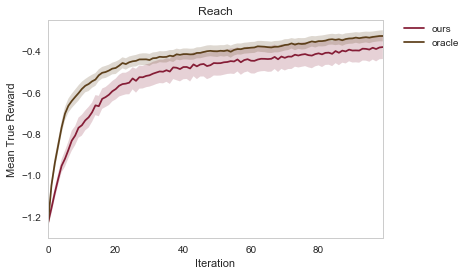

In [8]:
plt.figure(figsize=(6,4))
sns.tsplot(reach_ours, color=colors[0], condition='ours')
ax = sns.tsplot(reach_oracle, color=colors[1], condition='oracle')
ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Reach')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

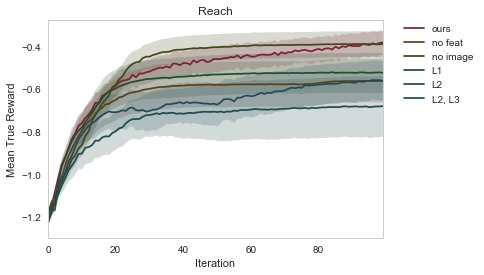

In [9]:
plt.figure(figsize=(6,4))
ax = sns.tsplot(reach_ours, color=colors[0], condition='ours')
sns.tsplot(reach_ours_nofeat, color=colors[1], condition='no feat')
sns.tsplot(reach_ours_noimage, color=colors[2], condition='no image')
sns.tsplot(reach_l1, color=colors[3], condition='L1')
sns.tsplot(reach_l2, color=colors[4], condition='L2')
ax =sns.tsplot(reach_l2l3, color=colors[5], condition='L2, L3')
ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Reach')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [10]:
# plt.figure(figsize=(6,4))
# paper_rc = {'lines.linewidth': 1, 'lines.markersize': 5}                  
# sns.set_context("paper", rc = paper_rc)
# sns.tsplot(np.array(reach_oracle), color=colors[0], condition='oracle', linestyle='--', err_style=None)
# paper_rc = {'lines.linewidth': 3, 'lines.markersize': 1}                  
# sns.set_context("paper", rc = paper_rc)    
# sns.tsplot(reach_ours, color='black', condition='ours')
# paper_rc = {'lines.linewidth': 1, 'lines.markersize': 1}                  
# sns.set_context("paper", rc = paper_rc)    
# ax = sns.tsplot(reach_inception_5b, color=colors[1], condition='inception 5b')
# sns.tsplot(reach_inception_6c, color=colors[2], condition='inception 6c')
# sns.tsplot(reach_inception_7c, color=colors[3], condition='inception 7c')
# # sns.tsplot(reach_inception_same_5b, color=colors2[4], condition='inception same 5b')
# # sns.tsplot(reach_inception_same_6c, color=colors2[5], condition='inception same 6c')
# # sns.tsplot(reach_inception_same_7c, color=colors2[6], condition='inception same 7c')
# sns.tsplot(reach_tpil_same, color=colors[4], condition='TPIL same')
# sns.tsplot(reach_tpil_changeonce, color=colors[5], condition='TPIL change once')
# sns.tsplot(reach_tpil_changing, color=colors[6], condition='TPIL changing')
# sns.tsplot(reach_gail, color=colors[7], condition='GAIL')
# ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Reach')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [11]:
push_comp = core.load_exps_data(['../rllab-push/data/s3/push-distract-comp'], False)
push_new1 = core.load_exps_data(['data/s3/r-push-new1'], False)
push_new2 = core.load_exps_data(['data/s3/r-push-new2'], False)
push_new3 = core.load_exps_data(['data/s3/r-push-new3'], False)
push_new_ours1 = core.load_exps_data(['data/s3/r-push-new-ours1'], False)
push_ours_old = collect_data(push_comp, {'json_args.env.env.mode' : 'ours'})
push_ours = collect_data(push_new_ours1, {'json_args.algo.mode2' : 'ours', 'json_args.algo.scale' : 1.0})
push_ours3 = collect_data(push_new3, {'json_args.algo.mode2' : 'ours'})
push_oracle = collect_data(push_new1, {'json_args.algo.mode2' : 'oracle'})
push_noimage = collect_data(push_new2, {'json_args.algo.mode2' : 'ours_noimage'})
push_nofeat = collect_data(push_new2, {'json_args.algo.mode2' : 'ours_nofeat'})

inception_push_new = core.load_exps_data(['data/s3/r-inception-push-new'], False)
push_inception_6c = collect_data(inception_push_new, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'push', 
                                           'json_args.algo.layer':'Mixed_6c'})
push_inception_7c = collect_data(inception_push_new, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'push', 
                                           'json_args.algo.layer':'Mixed_7c'})
push_inception_5b = collect_data(inception_push_new, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'push', 
                                           'json_args.algo.layer':'Mixed_5b'})

# push_inception_same_6c = collect_data(inception5, {'json_args.algo.mode' : 'inceptionsame',
#                                            'json_args.algo.name':'push', 
#                                            'json_args.algo.layer':'Mixed_6c'})
# push_inception_same_7c = collect_data(inception5, {'json_args.algo.mode' : 'inceptionsame',
#                                            'json_args.algo.name':'push', 
#                                            'json_args.algo.layer':'Mixed_7c'})
# push_inception_same_5b = collect_data(inception5, {'json_args.algo.mode' : 'inceptionsame',
#                                            'json_args.algo.name':'push', 
#                                            'json_args.algo.layer':'Mixed_5b'})
# push_cyberpunksanity = core.load_exps_data(['data/s3/r-push-tpil2'], False)
# push_tpil_same = collect_data(push_cyberpunksanity, {'json_args.algo.sanity' : 'same'})
push_tpil_changing =collect_data(push_new1, {'json_args.algo.mode2' : 'tpil'})
# push_tpil_changeonce = collect_data(push_cyberpunksanity, {'json_args.algo.sanity' : 'change1'})
# push_testgailpush = core.load_exps_data(['data/s3/testgailpush'], False)
push_gail = collect_data(push_new1, {'json_args.algo.mode2' : 'gail'})

Reading ../rllab-push/data/s3/push-distract-comp/progress.csv
[Errno 2] No such file or directory: '../rllab-push/data/s3/push-distract-comp/progress.csv'
Reading ../rllab-push/data/s3/push-distract-comp/push_distract_comp_2017_05_08_19_04_08_0002/progress.csv
Reading ../rllab-push/data/s3/push-distract-comp/push_distract_comp_2017_05_08_19_04_08_0002/gym_log/progress.csv
[Errno 2] No such file or directory: '../rllab-push/data/s3/push-distract-comp/push_distract_comp_2017_05_08_19_04_08_0002/gym_log/progress.csv'
Reading ../rllab-push/data/s3/push-distract-comp/push_distract_comp_2017_05_08_19_04_08_0021/progress.csv
Reading ../rllab-push/data/s3/push-distract-comp/push_distract_comp_2017_05_08_19_04_08_0021/gym_log/progress.csv
[Errno 2] No such file or directory: '../rllab-push/data/s3/push-distract-comp/push_distract_comp_2017_05_08_19_04_08_0021/gym_log/progress.csv'
Reading ../rllab-push/data/s3/push-distract-comp/push_distract_comp_2017_05_08_19_04_08_0030/progress.csv
Reading .

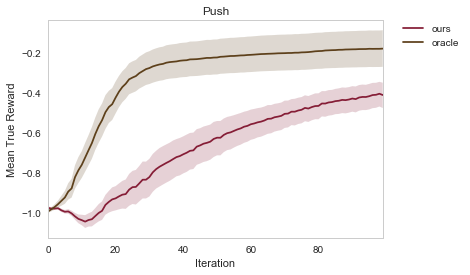

In [12]:
plt.figure(figsize=(6,4))
sns.tsplot(push_ours, color=colors[0], condition='ours')
ax = sns.tsplot(push_oracle, color=colors[1], condition='oracle')
ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Push')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

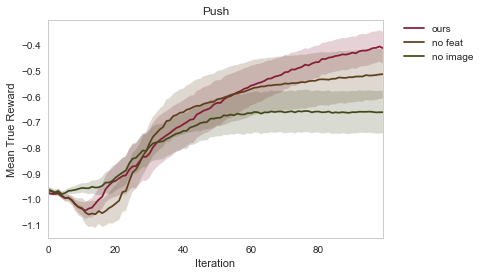

In [13]:
plt.figure(figsize=(6,4))
ax = sns.tsplot(push_ours, color=colors[0], condition='ours')
sns.tsplot(push_nofeat, color=colors[1], condition='no feat')
sns.tsplot(push_noimage, color=colors[2], condition='no image')
# sns.tsplot(push_l1, color=colors[3], condition='L1')
# sns.tsplot(push_l2, color=colors[4], condition='L2')
# ax =sns.tsplot(push_l2l3, color=colors[5], condition='L2, L3')
ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Push')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

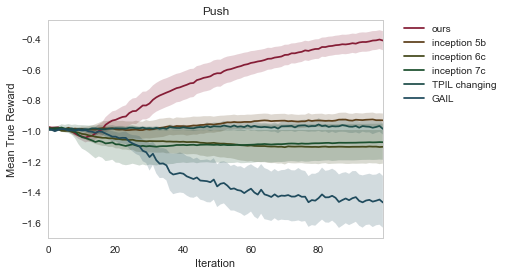

In [14]:
plt.figure(figsize=(6,4))
sns.tsplot(push_ours, color=colors[0], condition='ours')
ax = sns.tsplot(push_inception_5b, color=colors[1], condition='inception 5b')
sns.tsplot(push_inception_6c, color=colors[2], condition='inception 6c')
sns.tsplot(push_inception_7c, color=colors[3], condition='inception 7c')
# sns.tsplot(push_inception_same_5b, color=colors2[4], condition='inception same 5b')
# sns.tsplot(push_inception_same_6c, color=colors2[5], condition='inception same 6c')
# sns.tsplot(push_inception_same_7c, color=colors2[6], condition='inception same 7c')
# sns.tsplot(push_tpil_same, color=colors[4], condition='TPIL same')
# sns.tsplot(push_tpil_changeonce, color=colors[5], condition='TPIL change once')
sns.tsplot(push_tpil_changing, color=colors[4], condition='TPIL changing')
sns.tsplot(push_gail, color=colors[5], condition='GAIL')
ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Push')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [15]:
sweep1 = core.load_exps_data(['data/s3/r-sweep1'], False)
sweep_ours = collect_data(sweep1,  {'json_args.env.env.mode' : 'ours'})
sweep_oracle = collect_data(sweep1, {'json_args.env.env.mode' : 'oracle'})

sweep_inception = core.load_exps_data(['data/s3/r-sweep-inception'], False)
sweep_inception_6c = collect_data(sweep_inception, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'sweep', 
                                           'json_args.algo.layer':'Mixed_6c'})
sweep_inception_7c = collect_data(sweep_inception, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'sweep', 
                                           'json_args.algo.layer':'Mixed_7c'})
sweep_inception_5b = collect_data(sweep_inception, {'json_args.algo.mode' : 'inception',
                                           'json_args.algo.name':'sweep', 
                                           'json_args.algo.layer':'Mixed_5b'})

sweep_inception_same_6c = collect_data(sweep_inception, {'json_args.algo.mode' : 'inceptionsame',
                                           'json_args.algo.name':'sweep', 
                                           'json_args.algo.layer':'Mixed_6c'})
sweep_inception_same_7c = collect_data(sweep_inception, {'json_args.algo.mode' : 'inceptionsame',
                                           'json_args.algo.name':'sweep', 
                                           'json_args.algo.layer':'Mixed_7c'})
sweep_inception_same_5b = collect_data(sweep_inception, {'json_args.algo.mode' : 'inceptionsame',
                                           'json_args.algo.name':'sweep', 
                                           'json_args.algo.layer':'Mixed_5b'})
sweep_tpil = core.load_exps_data(['data/s3/r-sweep-tpil'], False)
sweep_tpil_same = collect_data(sweep_tpil, {'json_args.algo.sanity' : 'same'})
sweep_tpil_changing = collect_data(sweep_tpil, {'json_args.algo.sanity' : 'changing'})
sweep_tpil_changeonce = collect_data(sweep_tpil, {'json_args.algo.sanity' : 'change1'})
sweep_gail_data = core.load_exps_data(['data/s3/r-sweep-gail'], False)
sweep_gail = collect_data(sweep_gail_data, {})

Reading data/s3/r-sweep1/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-sweep1/progress.csv'
Reading data/s3/r-sweep1/r-sweep1_2017_05_15_15_14_18_0011/progress.csv
Reading data/s3/r-sweep1/r-sweep1_2017_05_15_15_14_18_0011/gym_log/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-sweep1/r-sweep1_2017_05_15_15_14_18_0011/gym_log/progress.csv'
Reading data/s3/r-sweep1/r-sweep1_2017_05_15_15_14_18_0002/progress.csv
Reading data/s3/r-sweep1/r-sweep1_2017_05_15_15_14_18_0002/gym_log/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-sweep1/r-sweep1_2017_05_15_15_14_18_0002/gym_log/progress.csv'
Reading data/s3/r-sweep1/r-sweep1_2017_05_15_15_14_18_0018/progress.csv
Reading data/s3/r-sweep1/r-sweep1_2017_05_15_15_14_18_0018/gym_log/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-sweep1/r-sweep1_2017_05_15_15_14_18_0018/gym_log/progress.csv'
Reading data/s3/r-sweep1/r-sweep1_2017_05_15_15_14_18_0006/progress.csv
Reading data/s3/r-sweep1/r-sweep

In [16]:
# plt.figure(figsize=(6,4))
# ax = sns.tsplot(sweep_ours, color=colors[0], condition='ours')
# sns.tsplot(sweep_oracle, color=colors[1], condition='oracle')
# ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Sweep')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
# plt.figure(figsize=(6,4))
# sns.tsplot(sweep_ours, color=colors[0], condition='ours')
# ax = sns.tsplot(sweep_inception_5b, color=colors[1], condition='inception 5b')
# sns.tsplot(sweep_inception_6c, color=colors[2], condition='inception 6c')
# sns.tsplot(sweep_inception_7c, color=colors[3], condition='inception 7c')
# # sns.tsplot(sweep_inception_same_5b, color=colors2[4], condition='inception same 5b')
# # sns.tsplot(sweep_inception_same_6c, color=colors2[5], condition='inception same 6c')
# # sns.tsplot(sweep_inception_same_7c, color=colors2[6], condition='inception same 7c')
# sns.tsplot(sweep_tpil_same, color=colors[4], condition='TPIL same')
# sns.tsplot(sweep_tpil_changeonce, color=colors[5], condition='TPIL change once')
# sns.tsplot(sweep_tpil_changing, color=colors[6], condition='TPIL changing')
# sns.tsplot(sweep_gail, color=colors[7], condition='GAIL')
# ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Sweep')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
strike_ours_quad3 = core.load_exps_data(['data/s3/r-strike-big2-ours-quad3/'], False)
strike_ours = collect_data(strike_ours_quad3,  {'json_args.env.env.scale' : 0.1})
strike_comp = core.load_exps_data(['data/s3/r-strike-big2-ours-quadcomp/'], False)
strike_oracle = collect_data(strike_comp, {'json_args.env.env.mode2' : 'oracle'})

strike_inception = core.load_exps_data(['data/s3/r-inception-strike2/'], False)
strike_inception_6c = collect_data(strike_inception, {
                                           'json_args.algo.layer':'Mixed_6c'})
strike_inception_7c = collect_data(strike_inception, {
                                           'json_args.algo.layer':'Mixed_7c'})
strike_inception_5b = collect_data(strike_inception, {
                                           'json_args.algo.layer':'Mixed_5b'})
strike_tpil2 = core.load_exps_data(['data/s3/r-strike-big2-tpil2/'], False)
strike_tpil3 = core.load_exps_data(['data/s3/r-strike-big2-tpil3/'], False)
# sweep_tpil_same = collect_data(sweep_tpil, {'json_args.algo.sanity' : 'same'})
# sweep_tpil_changing = collect_data(sweep_tpil, {'json_args.algo.sanity' : 'changing'})
# sweep_tpil_changeonce = collect_data(sweep_tpil, {'json_args.algo.sanity' : 'change1'})
# sweep_gail_data = core.load_exps_data(['data/s3/r-sweep-gail'], False)
strike_tpil = collect_data(strike_tpil3, {'json_args.algo.mode2' : 'tpil'})
strike_gail = collect_data(strike_tpil2, {'json_args.algo.mode2' : 'gail'})

Reading data/s3/r-strike-big2-ours-quad3/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-strike-big2-ours-quad3/progress.csv'
Reading data/s3/r-strike-big2-ours-quad3/r-strike-big2-ours-quad3_2017_06_03_00_04_01_0024/progress.csv
Reading data/s3/r-strike-big2-ours-quad3/r-strike-big2-ours-quad3_2017_06_03_00_04_01_0024/gym_log/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-strike-big2-ours-quad3/r-strike-big2-ours-quad3_2017_06_03_00_04_01_0024/gym_log/progress.csv'
Reading data/s3/r-strike-big2-ours-quad3/r-strike-big2-ours-quad3_2017_06_03_00_04_01_0018/progress.csv
Reading data/s3/r-strike-big2-ours-quad3/r-strike-big2-ours-quad3_2017_06_03_00_04_01_0018/gym_log/progress.csv
[Errno 2] No such file or directory: 'data/s3/r-strike-big2-ours-quad3/r-strike-big2-ours-quad3_2017_06_03_00_04_01_0018/gym_log/progress.csv'
Reading data/s3/r-strike-big2-ours-quad3/r-strike-big2-ours-quad3_2017_06_03_00_04_01_0034/progress.csv
Reading data/s3/r-strike-big2-ours-quad

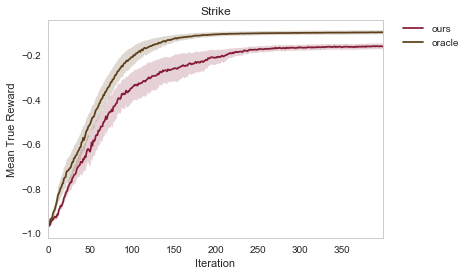

In [19]:
plt.figure(figsize=(6,4))
ax = sns.tsplot(strike_ours, color=colors[0], condition='ours')
sns.tsplot(strike_oracle, color=colors[1], condition='oracle')
ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Strike')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
# plt.figure(figsize=(6,4))
# sns.tsplot(strike_ours, color=colors[0], condition='ours')
# ax = sns.tsplot(strike_inception_5b, color=colors[1], condition='inception 5b')
# sns.tsplot(strike_inception_6c, color=colors[2], condition='inception 6c')
# sns.tsplot(strike_inception_7c, color=colors[3], condition='inception 7c')
# # sns.tsplot(sweep_inception_same_5b, color=colors2[4], condition='inception same 5b')
# # sns.tsplot(sweep_inception_same_6c, color=colors2[5], condition='inception same 6c')
# # sns.tsplot(sweep_inception_same_7c, color=colors2[6], condition='inception same 7c')
# # sns.tsplot(sweep_tpil_same, color=colors[4], condition='TPIL same')
# # sns.tsplot(sweep_tpil_changeonce, color=colors[5], condition='TPIL change once')
# sns.tsplot(strike_tpil, color=colors[4], condition='TPIL')
# sns.tsplot(strike_gail, color=colors[5], condition='GAIL')
# ax.set(xlabel='Iteration', ylabel='Mean True Reward', title='Strike')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

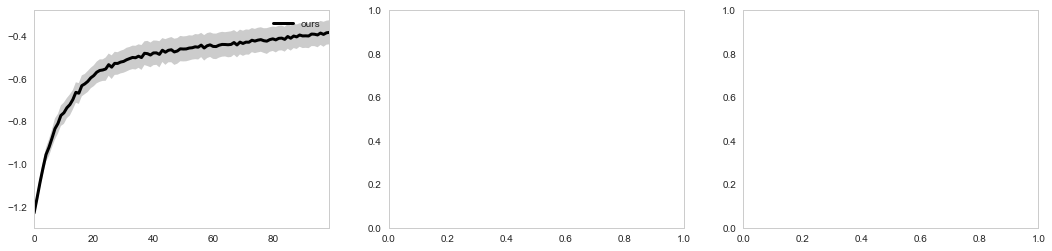

In [21]:
colors = ['#e41a1c',
'#377eb8',
'#4daf4a',
'#984ea3',
'#ff7f00',
'#a65628',
'#f781bf']
ylabel = 'Mean Ground Truth Reward'
xlabel = 'Iteration'
ours = 'ours'
oracle = 'oracle'
inc5 = 'inception 5b'
inc6 = 'inception 6c'
inc7 = 'inception 7c'
tpils = 'TPIL same'
tpilc1 = 'TPIL different'
tpilc = 'TPIL changing'
gail = 'GAIL'
reach = 'Reach'
push = 'Push'
sweep = 'Sweep'

sns.set(font_scale=1)
sns.set_style("whitegrid", {'axes.grid' : False})
colorours = 'black'
context = 'notebook'
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,4))
ours_paper_rc = {'lines.linewidth': 3}                  
sns.set_context(context, rc = ours_paper_rc)
sns.tsplot(reach_ours, color=colorours, condition=ours, ax=ax1)
paper_rc = {'lines.linewidth': 1}                  
sns.set_context(context, rc = paper_rc)
# sns.tsplot(reach_oracle, color=colors[0], condition=oracle, ax=ax1, linestyle='--', err_style=None)
# sns.tsplot(reach_inception_5b, color=colors[1], condition=inc5, ax=ax1)
# sns.tsplot(reach_inception_6c, color=colors[2], condition=inc6, ax=ax1)
# sns.tsplot(reach_inception_7c, color=colors[3], condition=inc7, ax=ax1)
# sns.tsplot(reach_tpil_same, color=colors[4], condition=tpils, ax=ax1)
# sns.tsplot(reach_tpil_changeonce, color=colors[5], condition=tpilc1, ax=ax1)
# sns.tsplot(reach_tpil_changing, color=colors[6], condition=tpilc, ax=ax1)
# sns.tsplot(reach_gail, color=colors[7], condition=gail, ax=ax1)
# ax1.set(xlabel=xlabel, ylabel=ylabel, title=reach)
# ax1.legend_.remove()
          
# sns.set_context(context, rc = ours_paper_rc)
# sns.tsplot(push_ours, color=colorours, condition=ours, ax=ax2)           
# sns.set_context(context, rc = paper_rc)
# sns.tsplot(push_oracle, color=colors[0], condition=oracle, ax=ax2, linestyle='--', err_style=None)
# sns.tsplot(push_inception_5b, color=colors[1], condition=inc5, ax=ax2)
# sns.tsplot(push_inception_6c, color=colors[2], condition=inc6, ax=ax2)
# sns.tsplot(push_inception_7c, color=colors[3], condition=inc7, ax=ax2)
# sns.tsplot(push_tpil_same, color=colors[4], condition=tpils, ax=ax2)
# sns.tsplot(push_tpil_changeonce, color=colors[5], condition=tpilc1, ax=ax2)
# sns.tsplot(push_tpil_changing, color=colors[6], condition=tpilc, ax=ax2)
# sns.tsplot(push_gail, color=colors[7], condition=gail, ax=ax2)
# ax2.set(xlabel=xlabel, ylabel=ylabel, title=push)
# ax2.legend_.remove()

# sns.set_context(context, rc = ours_paper_rc)
# sns.tsplot(sweep_ours, color=colorours, condition=ours, ax=ax3)           
# sns.set_context(context, rc = paper_rc)
# sns.tsplot(sweep_oracle, color=colors[0], condition=oracle, ax=ax3, linestyle='--', err_style=None)
# sns.tsplot(sweep_inception_5b, color=colors[1], condition=inc5, ax=ax3)
# sns.tsplot(sweep_inception_6c, color=colors[2], condition=inc6, ax=ax3)
# sns.tsplot(sweep_inception_7c, color=colors[3], condition=inc7, ax=ax3)
# sns.tsplot(sweep_tpil_same, color=colors[4], condition=tpils, ax=ax3)
# sns.tsplot(sweep_tpil_changeonce, color=colors[5], condition=tpilc1, ax=ax3)
# sns.tsplot(sweep_tpil_changing, color=colors[6], condition=tpilc, ax=ax3)
# sns.tsplot(sweep_gail, color=colors[7], condition=gail, ax=ax3)
# ax3.set(xlabel=xlabel, ylabel=ylabel, title=sweep)
# ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

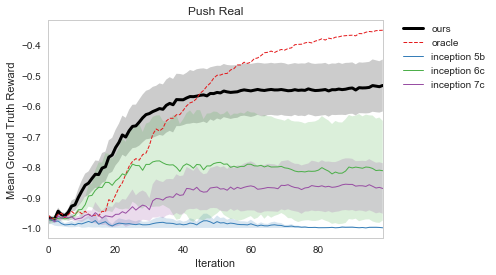

In [22]:
real = 'Push Real'
plt.figure(figsize=(6,4))
sns.set_context(context, rc = ours_paper_rc)
sns.tsplot(real_ours, color=colorours, condition=ours)
sns.set_context(context, rc = paper_rc)
sns.tsplot(real_oracle, color=colors[0], condition=oracle, linestyle='--', err_style=None)
ax = sns.tsplot(real_inception_5b, color=colors[1], condition=inc5)
sns.tsplot(real_inception_6c, color=colors[2], condition=inc6)
sns.tsplot(real_inception_7c, color=colors[3], condition=inc7)
ax.set(xlabel=xlabel, ylabel=ylabel, title=real)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

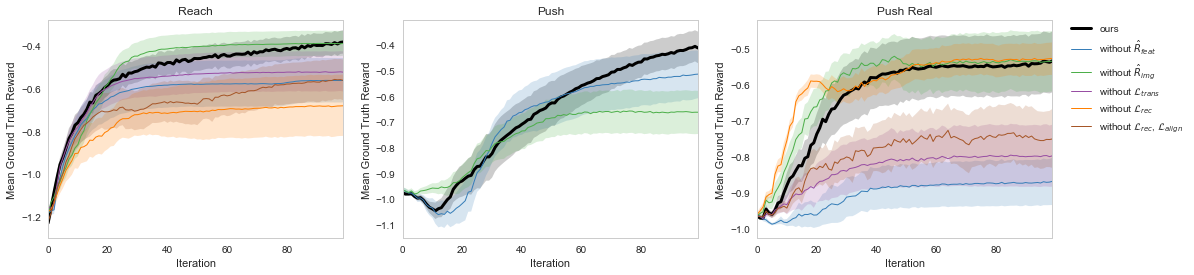

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,4))
# plt.figure()
nofeat = 'without $\hat{R}_{feat}$'
noimage = 'without $\hat{R}_{img}$'
l1 = 'without $\mathcal{L}_{trans}$'
l2 = 'without $\mathcal{L}_{rec}$'
l2l3 = 'without $\mathcal{L}_{rec}$, $\mathcal{L}_{align}$'
sns.set_context(context, rc = ours_paper_rc)
sns.tsplot(reach_ours, color=colorours, condition=ours, ax = ax1)
sns.set_context(context, rc = paper_rc)
sns.tsplot(reach_ours_nofeat, color=colors[1], condition=nofeat, ax = ax1)
sns.tsplot(reach_ours_noimage, color=colors[2], condition=noimage, ax = ax1)
sns.tsplot(reach_l1, color=colors[3], condition=l1, ax = ax1)
sns.tsplot(reach_l2, color=colors[4], condition=l2, ax = ax1)
sns.tsplot(reach_l2l3, color=colors[5], condition=l2l3, ax = ax1)
ax1.set(xlabel=xlabel, ylabel=ylabel, title=reach)
ax1.legend_.remove()
sns.set_context(context, rc = ours_paper_rc)
sns.tsplot(push_ours, color=colorours, condition=ours, ax=ax2)
sns.set_context(context, rc = paper_rc)
sns.tsplot(push_nofeat, color=colors[1], condition=nofeat, ax=ax2)
sns.tsplot(push_noimage, color=colors[2], condition=noimage, ax=ax2)
ax2.set(xlabel=xlabel, ylabel=ylabel, title=push)
ax2.legend_.remove()

sns.set_context(context, rc = ours_paper_rc)
sns.tsplot(real_ours, color=colorours, condition=ours, ax=ax3)
sns.set_context(context, rc = paper_rc)
sns.tsplot(real_ours_nofeat, color=colors[1], condition=nofeat, ax=ax3)
sns.tsplot(real_ours_noimage, color=colors[2], condition=noimage, ax=ax3)
sns.tsplot(real_l1, color=colors[3], condition=l1, ax=ax3)
sns.tsplot(real_l2, color=colors[4], condition=l2, ax=ax3)
sns.tsplot(real_l2l3, color=colors[5], condition=l2l3, ax=ax3)
ax3.set(xlabel=xlabel, ylabel=ylabel, title=real)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

0.85 +/- 0.357071421427
0.55 +/- 0.497493718553
0.75 +/- 0.433012701892
0.55 +/- 0.497493718553
0.45 +/- 0.497493718553
0.55 +/- 0.497493718553
0.85 +/- 0.357071421427
0.6 +/- 0.489897948557
0.4 +/- 0.489897948557
0.7 +/- 0.458257569496
0.2 +/- 0.4
0.6 +/- 0.489897948557
0.3 +/- 0.458257569496
0.5 +/- 0.5
0.3 +/- 0.458257569496


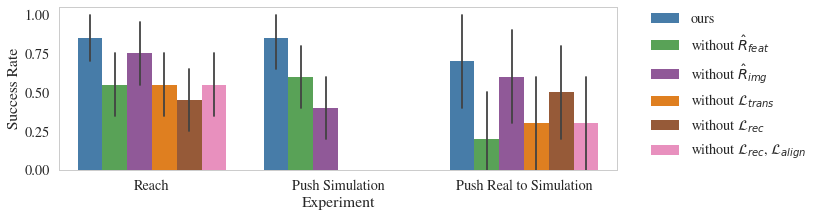

In [78]:
plt.figure(figsize=(10,3))
df = pd.concat([pd.DataFrame({exp:reach, method:ours, reward: final(reach_ours)}),
                pd.DataFrame({exp:reach, method:nofeat, reward: final(reach_ours_nofeat)}),
                pd.DataFrame({exp:reach, method:noimage, reward: final(reach_ours_noimage)}),
                pd.DataFrame({exp:reach, method:l1, reward: final(reach_l1)}),
                pd.DataFrame({exp:reach, method:l2, reward: final(reach_l2)}),
                pd.DataFrame({exp:reach, method:l2l3, reward: final(reach_l2l3)}),
                pd.DataFrame({exp:push, method:ours, reward: final(push_ours3)}),
                pd.DataFrame({exp:push, method:nofeat, reward: final(push_nofeat)}),
                pd.DataFrame({exp:push, method:noimage, reward: final(push_noimage)}),
#                 pd.DataFrame({exp:push, method:l1, reward: final(push_l1)}),
#                 pd.DataFrame({exp:push, method:l2, reward: final(push_l2)}),
#                 pd.DataFrame({exp:push, method:l2l3, reward: final(push_l2l3)}),
                pd.DataFrame({exp:real, method:ours, reward: final(real_ours)}),
                pd.DataFrame({exp:real, method:nofeat, reward: final(real_ours_nofeat)}),
                pd.DataFrame({exp:real, method:noimage, reward: final(real_ours_noimage)}),
                pd.DataFrame({exp:real, method:l1, reward: final(real_l1)}),
                pd.DataFrame({exp:real, method:l2, reward: final(real_l2)}),
                pd.DataFrame({exp:real, method:l2l3, reward: final(real_l2l3)}),
               ])
ax = sns.barplot(x = exp, y = reward, hue = method, data = df, palette=colors[1:])
ax.set(ylabel='Success Rate')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

0.9 +/- 0.3
0.85 +/- 0.357071421427
0.25 +/- 0.433012701892
0.0 +/- 0.0
0.0 +/- 0.0
0.9 +/- 0.3
0.85 +/- 0.357071421427
0.0 +/- 0.0
0.0 +/- 0.0
0.0 +/- 0.0
1.0 +/- 0.0
1.0 +/- 0.0
0.7 +/- 0.458257569496
0.0 +/- 0.0
0.0 +/- 0.0
1.0 +/- 0.0
0.95 +/- 0.217944947177
0.05 +/- 0.217944947177
0.0 +/- 0.0
0.0 +/- 0.0


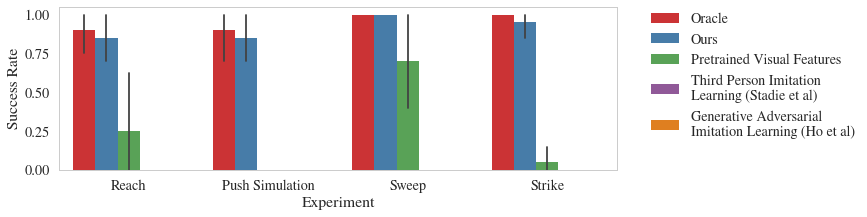

In [95]:
def final(data, idx=-1):
    return [-d[idx] for d in data]
def final(data, idx=-1, thresh=-0.5):
    successes =  [1 if d[idx] > thresh else 0 for d in data]
    print(np.mean(successes), '+/-', np.std(successes))
    return successes
plt.figure(figsize=(10,3))
method = 'Method'
reward = 'Distance'
exp = 'Experiment'
ours = 'Ours'
oracle = 'Oracle'
inc = 'Pretrained Visual Features'
inc5 = 'inception 5b'
inc6 = 'inception 6c'
inc7 = 'inception 7c'
tpil = 'Third Person Imitation \nLearning (Stadie et al)'
tpils = 'TPIL same'
tpilc1 = 'TPIL change once'
tpilc = 'TPIL changing'
gail = 'Generative Adversarial \nImitation Learning (Ho et al)'
reach = 'Reach'
push = 'Push Simulation'
real = 'Push Real to Simulation'
sweep = 'Sweep'
strike = 'Strike'
reach_thresh = -0.5
push_thresh = -0.5
sweep_thresh = -0.55
strike_thresh = -0.5
sns.set_style("whitegrid", {'axes.grid' : False, 'font.family':  "FreeSerif", 'font.weight':'blackasdf', 'font.scale':2.0})
paper_rc = {'lines.linewidth': 1}
# # sns.set(font="Times New Roman")
sns.set_context('talk', rc = paper_rc, font_scale=1.1)
# sns.set(font_scale=1.2)
df = pd.concat([pd.DataFrame({exp:reach, method:oracle, reward: final(reach_oracle, thresh=reach_thresh)}),
                pd.DataFrame({exp:reach, method:ours, reward: final(reach_ours, thresh=reach_thresh)}),
#                 pd.DataFrame({exp:reach, method:inc5, reward: final(reach_inception_5b)}),
                pd.DataFrame({exp:reach, method:inc, reward: final(reach_inception_6c, thresh=reach_thresh)}),
#                 pd.DataFrame({exp:reach, method:inc7, reward: final(reach_inception_7c)}),
#                 pd.DataFrame({exp:reach, method:tpils, reward: final(reach_tpil_same)}),
#                 pd.DataFrame({exp:reach, method:tpilc1, reward: final(reach_tpil_changeonce)}),
                pd.DataFrame({exp:reach, method:tpil, reward: final(reach_tpil_changing, thresh=reach_thresh)}),
                pd.DataFrame({exp:reach, method:gail, reward: final(reach_gail, thresh=reach_thresh)}),
                pd.DataFrame({exp:push, method:oracle, reward: final(push_oracle, thresh=push_thresh)}),
                pd.DataFrame({exp:push, method:ours, reward: final(push_ours3, thresh=push_thresh)}),
                pd.DataFrame({exp:push, method:inc, reward: final(push_inception_5b, thresh=push_thresh)}),
#                 pd.DataFrame({exp:push, method:inc6, reward: final(push_inception_6c)}),
#                 pd.DataFrame({exp:push, method:inc7, reward: final(push_inception_7c)}),
#                 pd.DataFrame({exp:push, method:tpils, reward: final(push_tpil_same)}),
#                 pd.DataFrame({exp:push, method:tpilc1, reward: final(push_tpil_changeonce)}),
                pd.DataFrame({exp:push, method:tpil, reward: final(push_tpil_changing, thresh=push_thresh)}),
                pd.DataFrame({exp:push, method:gail, reward: final(push_gail, thresh=push_thresh)}),
                pd.DataFrame({exp:sweep, method:oracle, reward: final(sweep_oracle, thresh=sweep_thresh)}),
                pd.DataFrame({exp:sweep, method:ours, reward: final(sweep_ours, thresh=sweep_thresh)}),
#                 pd.DataFrame({exp:sweep, method:inc5, reward: final(sweep_inception_5b)}),
                pd.DataFrame({exp:sweep, method:inc, reward: final(sweep_inception_6c, thresh=sweep_thresh)}),
#                 pd.DataFrame({exp:sweep, method:inc7, reward: final(sweep_inception_7c)}),
#                 pd.DataFrame({exp:sweep, method:tpils, reward: final(sweep_tpil_same)}),
#                 pd.DataFrame({exp:sweep, method:tpilc1, reward: final(sweep_tpil_changeonce)}),
                pd.DataFrame({exp:sweep, method:tpil, reward: final(sweep_tpil_changing, thresh=sweep_thresh)}),
                pd.DataFrame({exp:sweep, method:gail, reward: final(sweep_gail, thresh=sweep_thresh)}),
                
                pd.DataFrame({exp:strike, method:oracle, reward: final(strike_oracle, idx=199, thresh=strike_thresh)}),
                pd.DataFrame({exp:strike, method:ours, reward: final(strike_ours, idx=199, thresh=strike_thresh)}),
#                 pd.DataFrame({exp:sweep, method:inc5, reward: final(sweep_inception_5b)}),
                pd.DataFrame({exp:strike, method:inc, reward: final(strike_inception_6c, idx=199, thresh=strike_thresh)}),
#                 pd.DataFrame({exp:sweep, method:inc7, reward: final(sweep_inception_7c)}),
#                 pd.DataFrame({exp:sweep, method:tpils, reward: final(sweep_tpil_same)}),
#                 pd.DataFrame({exp:sweep, method:tpilc1, reward: final(sweep_tpil_changeonce)}),
                pd.DataFrame({exp:strike, method:tpil, reward: final(strike_tpil, thresh=strike_thresh)}),
                pd.DataFrame({exp:strike, method:gail, reward: final(strike_gail, idx=199, thresh=strike_thresh)}),
               ])
ax = sns.barplot(x = exp, y = reward, hue = method, data = df, palette=colors)
ax.set(ylabel='Success Rate')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [96]:
np.mean(final(push_ours)), np.mean(final(push_ours_old))

0.733333333333 +/- 0.442216638714
1.0 +/- 0.0


(0.73333333333333328, 1.0)

0.8 +/- 0.4
0.7 +/- 0.458257569496
0.25 +/- 0.433012701892
0.0 +/- 0.0


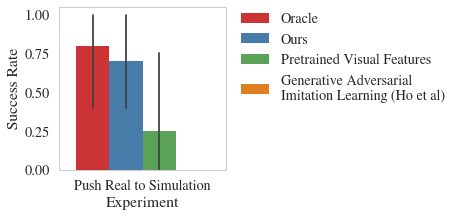

In [97]:
plt.figure(figsize=(3,3))
real_thresh = -0.5
df = pd.concat([
                pd.DataFrame({exp:real, method:oracle, reward: final(real_oracle)}),
                pd.DataFrame({exp:real, method:ours, reward: final(real_ours)}),
#                 pd.DataFrame({exp:real, method:inc5, reward: final(real_inception_5b)}),
                pd.DataFrame({exp:real, method:inc, reward: final(real_inception_6c)}),
#                 pd.DataFrame({exp:real, method:inc7, reward: final(real_inception_7c)}),
#                 pd.DataFrame({exp:real, method:tpils, reward: final(real_tpil_same)}),
#                 pd.DataFrame({exp:real, method:tpilc1, reward: final(real_tpil_changeonce)}),
#                 pd.DataFrame({exp:real, method:tpilc, reward: final(real_tpil_changing)}),
#                 pd.DataFrame({exp:real, method:gail, reward: final(real_gail)}),
                pd.DataFrame({exp:real, method:gail, reward: final(real_gail)}),
               ])
ax = sns.barplot(x = exp, y = reward, hue = method, data = df, palette=colors[:3] + [colors[4]])
ax.set(ylabel='Success Rate')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

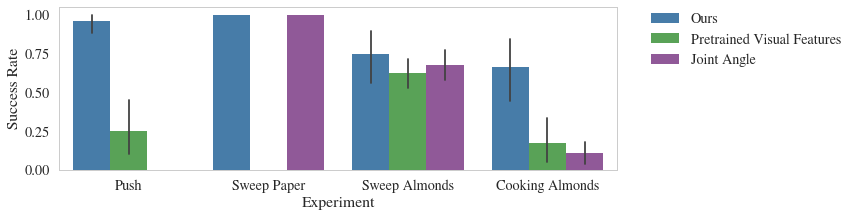

In [98]:
plt.figure(figsize=(10,3))
def success(data):
    return [1 if d < 10 else 0 for d in data]
method = 'Method'
reward = 'Distance'
inc5 = 'inception 5b'
inc6 = 'inception 6c'
inc7 = 'inception 7c'
tpils = 'TPIL same'
tpilc1 = 'TPIL change once'
tpilc = 'TPIL changing'
gail = 'GAIL'
reach = 'Reach'
push = 'Push'
sweep = 'Sweep'
test = 'Push'
joint = 'Joint Angle'
oursdata =  [5.5, 3, 4.8, 4.7, 7.5, 7.4, 6.6, 7.7, 8.7, 7.2, 6.2, 7,
             8.4, 6.3, 6.3, 5, 8, 6.2, 5.4, 5.1, 4.5, 7.5, 7, 6,11.3, 7]
statedata = [18.1, 19, 17, 15.1, 12.2, 13.5, 16.6, 18.2, 13, 19.5, 16.2,
             11.8, 13.6, 16.3, 17.7, 17.5, 13.5, 17.6, 17.1, 16.2]
inceptiondata = [9, 14, 9.2, 11, 11.3, 13, 10.8, 11.2, 9.4, 10.2,
13.1, 14.6, 10.8, 13, 13.6, 13.3, 9.2, 11.4, 9.6, 10.4]

sweepalmours = 1-np.array([1,5,10,1,2,3,4,18,6,0,0])/18.0
sweepalmstate = 1-np.array([6,4,3,10,8,2,8,8,4])/18.0
sweepalminc = 1-np.array([5,8,9,6,3,12,1,7,8,10,6])/18.0
sweepalm = 'Sweep Almonds'
sweeppaperours = [1]
sweeppaperstate = [1]
sweeppaperinc = [0]
sweeppaper = 'Sweep Paper'

pouralmours = np.array([14, 16, 8, 11, 15, 14, 1, 2, 16, 9])/ 16.0
pouralmstate = np.array([1,5,2,0,0,3,0,1,5,0])/16.0
pouralminc = np.array([1,2,2,0,3,0,12,0,0,8])/16.0
pouralm = 'Cooking Almonds'


df = pd.concat([pd.DataFrame({exp:test, method:ours, reward: success(oursdata)}),
                pd.DataFrame({exp:test, method:inc, reward: success(inceptiondata)}),
                pd.DataFrame({exp:test, method:joint, reward: success(statedata)}),
                pd.DataFrame({exp:sweeppaper, method:ours, reward: sweeppaperours}),
                pd.DataFrame({exp:sweeppaper, method:inc, reward: sweeppaperinc}),
                pd.DataFrame({exp:sweeppaper, method:joint, reward: sweeppaperstate}),
                pd.DataFrame({exp:sweepalm, method:ours, reward: sweepalmours}),
                pd.DataFrame({exp:sweepalm, method:inc, reward: sweepalminc}),
                pd.DataFrame({exp:sweepalm, method:joint, reward: sweepalmstate}),
                pd.DataFrame({exp:pouralm, method:ours, reward: pouralmours}),
                pd.DataFrame({exp:pouralm, method:inc, reward: pouralminc}),
                pd.DataFrame({exp:pouralm, method:joint, reward: pouralmstate}),
               ])
ax = sns.barplot(x = exp, y = reward, hue=method, data = df, palette=[colors[1]] +colors[2:])
ax.set(ylabel='Success Rate')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [29]:
def stats(data):
    print(np.mean(data), '+/-', np.std(data))
print('push')
stats(success(oursdata))
stats(success(inceptiondata)),
stats(success(statedata)),
print('sweep paper')
stats(sweeppaperours)
stats(sweeppaperinc)
stats(sweeppaperstate)
print('sweep almonds')
stats(sweepalmours)
stats(sweepalminc)
stats(sweepalmstate)
print('pour almonds')
stats(pouralmours)
stats(pouralminc)
stats(pouralmstate)

push
0.961538461538 +/- 0.192307692308
0.25 +/- 0.433012701892
0.0 +/- 0.0
sweep paper
1.0 +/- 0.0
0.0 +/- 0.0
1.0 +/- 0.0
sweep almonds
0.747474747475 +/- 0.284626319265
0.621212121212 +/- 0.165514844527
0.672839506173 +/- 0.144502468034
pour almonds
0.6625 +/- 0.328585985702
0.175 +/- 0.240117158904
0.10625 +/- 0.11875
